This continues my exploration through data from data.utah.gov about school (K-12) performance. The data includes information about the grades of all of the schools throughout Utah in terms of their performance. This script will create some visualizations of the cleaned data to get a better idea of what the data looks like to inform analysis.

In [65]:
import pandas as pd

school = pd.read_csv("filtered_data.csv")
print(school.columns)

Index(['Unnamed: 0', 'index', 'District', 'School', 'School Type',
       'Overall Points', 'Overall Possible', 'Grade',
       'All Students Participation', 'Below Proficient Participation',
       'Growth ELA All Students', 'Growth ELA All Students Possible',
       'Growth Math All Students', 'Growth Math All Students Possible',
       'Growth Science All Students', 'Growth Science All Students Possible',
       'Growth ELA Below Proficient', 'Growth ELA Below Proficient Possible',
       'Growth Math Below Proficient', 'Growth Math Below Proficient Possible',
       'Growth Science Below Proficient',
       'Growth Science Below Proficient Possible', 'ELA Proficient',
       'ELA Proficient Possible', 'Math Proficient',
       'Math Proficient Possible', 'Science Proficient',
       'Science Proficient Possible', 'College Career Readiness GRAD',
       'College Career Readiness GRAD Possible',
       'Number of Students Meeting All Four CCR Benchmarks ACT',
       'College Career R

I thought I would borrow a few of the principles from Randal S Olson's blog post about making matplotlib visualizations beautiful. You can find that here: http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/. We'll start by making the colors more palatable:

In [66]:
import matplotlib.pyplot as plt

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 

# But matplotlib doesn't recognize these colors, so we have to go through and change them:
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)


Here we start plotting based on some of the percent columns

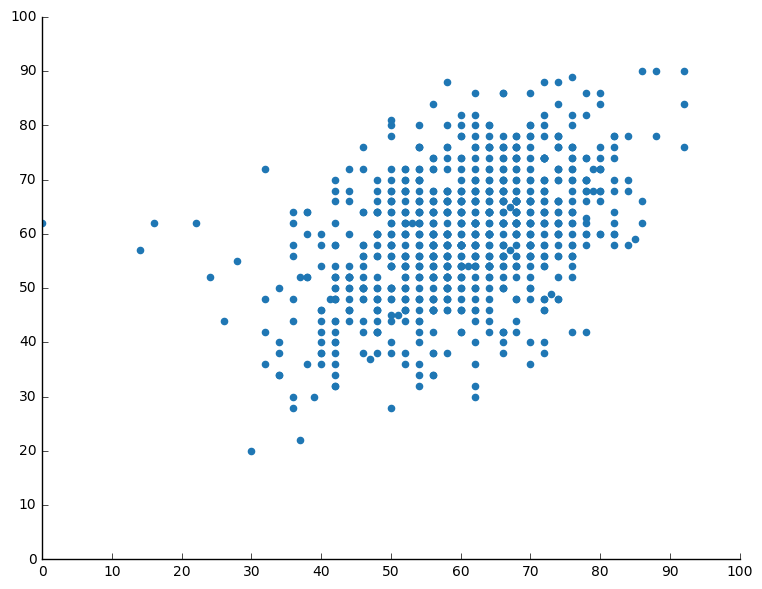

In [67]:
percent_columns = list(filter(lambda x : 'percent' in x, school.columns))
plt.figure(figsize=(9, 7))
ax = plt.subplot(111)   
ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xticks(range(0, 101, 10))
plt.yticks(range(0, 101, 10))
plt.scatter(school.growth_math_percent, school.growth_science_percent, color=[tableau20[0]])

plt.show()

In [68]:
# Makes titles readable
def clean_label(label):
    lst = label.split('_')
    s = ' '
    for i in range(len(lst)):
        lst[i] = lst[i].capitalize()
    new_label = s.join(lst)
    return new_label   

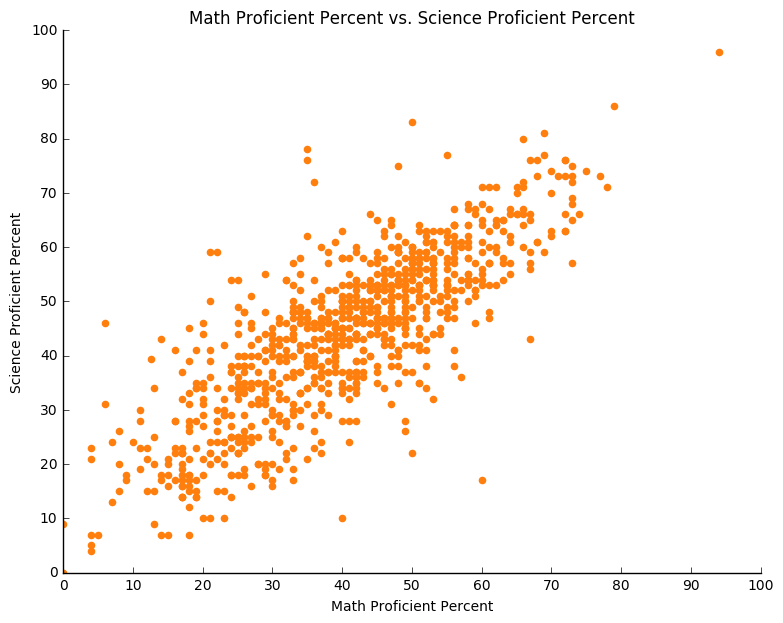

In [69]:
# We create a function so we don't have to make the same changes everytime
def make_figure(x_name, y_name, c):
    plt.figure(figsize=(9, 7))
    ax = plt.subplot(1,1,1)
    ax.spines["top"].set_visible(False)    
    ax.spines["right"].set_visible(False)
    x_c = clean_label(x_name)
    y_c = clean_label(y_name)
    ax.set_title(x_c + ' vs. ' + y_c)
    ax.set_xlabel(x_c)
    ax.set_ylabel(y_c)
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.xticks(range(0, 101, 10))
    plt.yticks(range(0, 101, 10))
    plt.scatter(school[x_name], school[y_name], color=c)
    plt.show()
    
make_figure('math_proficient_percent', 'science_proficient_percent', tableau20[2])

Now that we have the functions ready to make some decent graphs, we'll go through and graph a few more

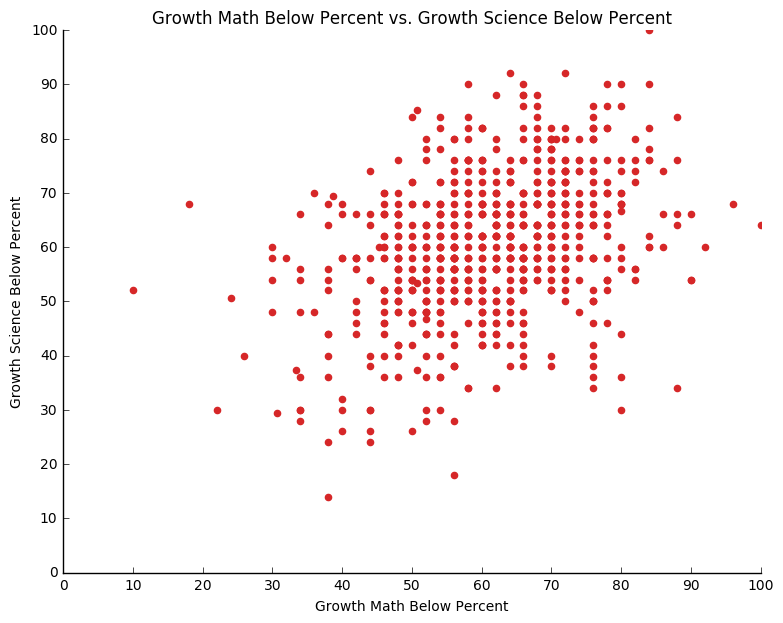

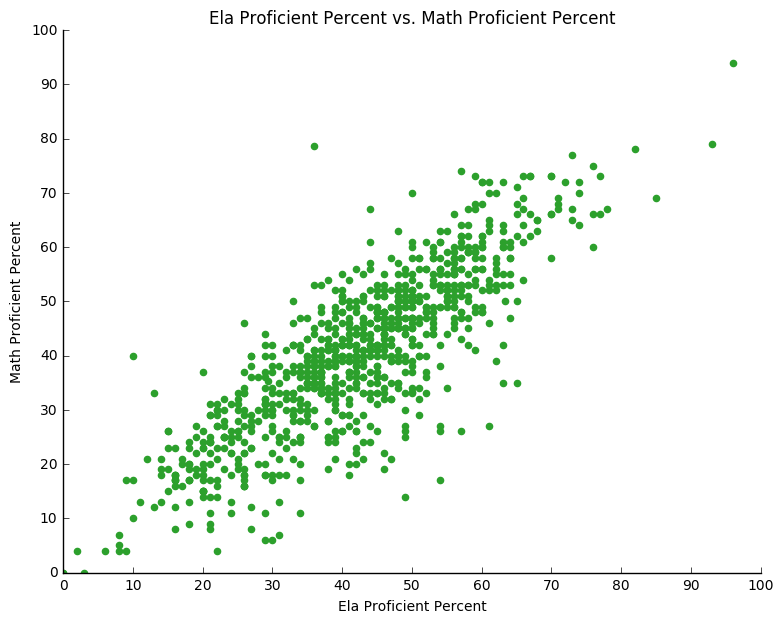

In [70]:
make_figure('growth_math_below_percent',
       'growth_science_below_percent', tableau20[6])
make_figure('ela_proficient_percent', 'math_proficient_percent', tableau20[4])

As we might expect, it looks like schools that do well on math tend to also do pretty well at science. Now let's see what a bar graph looks like for some of these percents so we can see how the percentages are distributed. Let's use a new function, similar to the last but for bar graphs

In [71]:
def make_hist_figure(x, color):
    plt.figure(figsize=(9,7))
    ax = plt.subplot(1,1,1)
    ax.spines["top"].set_visible(False)    
    ax.spines["right"].set_visible(False)
    x_title = clean_label(x)
    ax.set_title(x_title)
    ax.set_xlabel(x_title)
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()
    plt.xticks(range(0, 101, 10))
    plt.xlim(0, 100)
    plt.hist(school[x], bins=10, range=(0,100), color=color)
    plt.show()

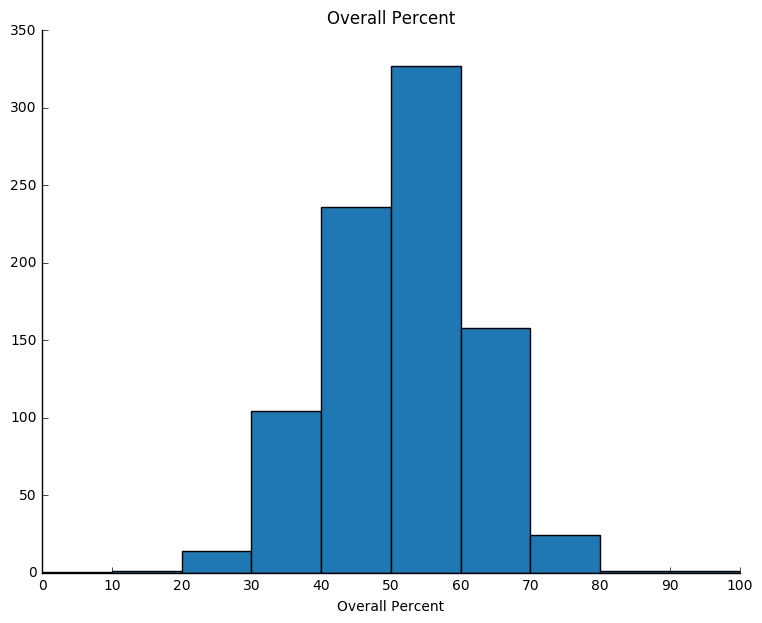

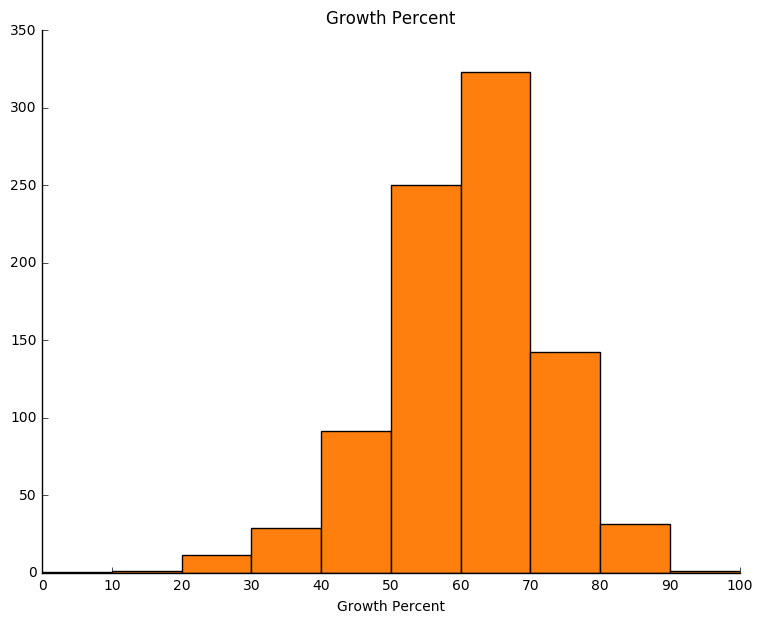

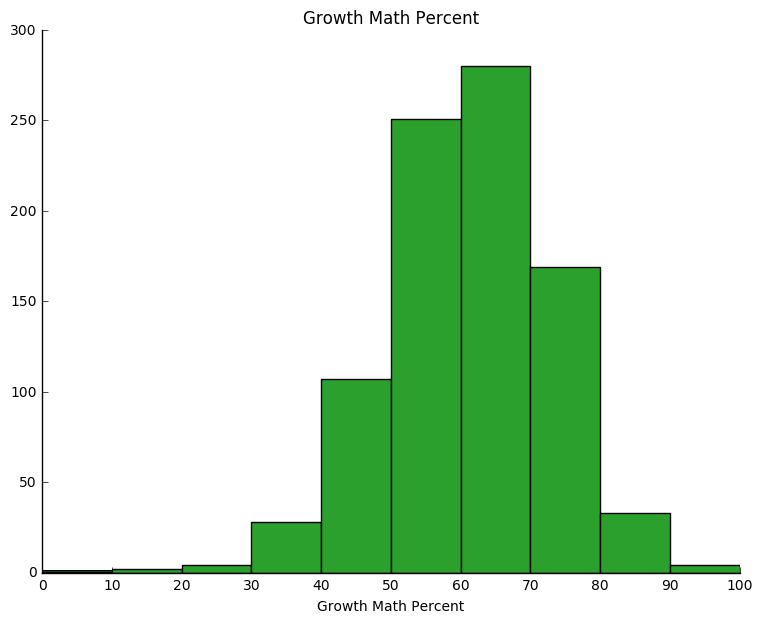

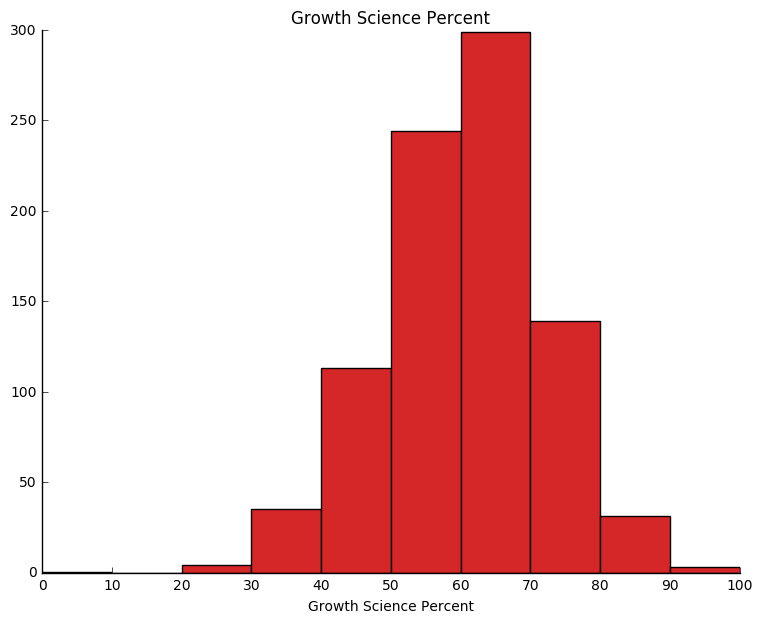

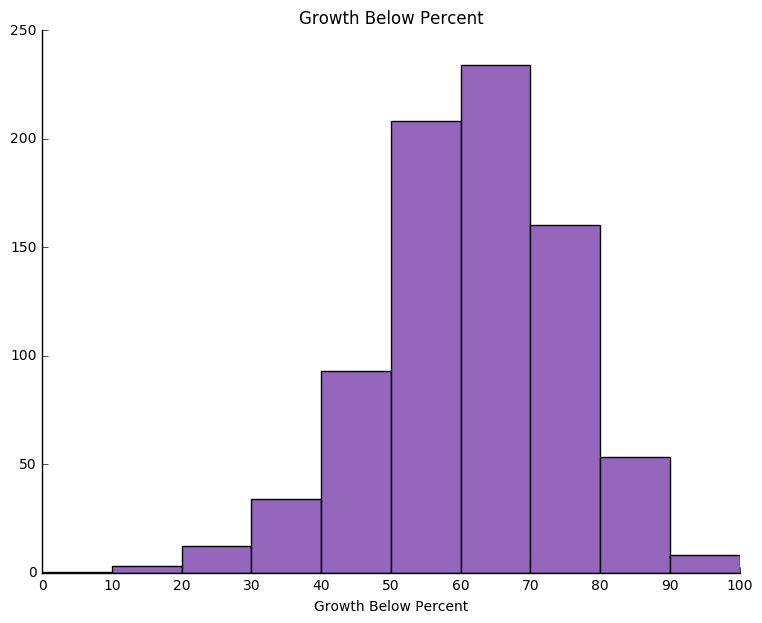

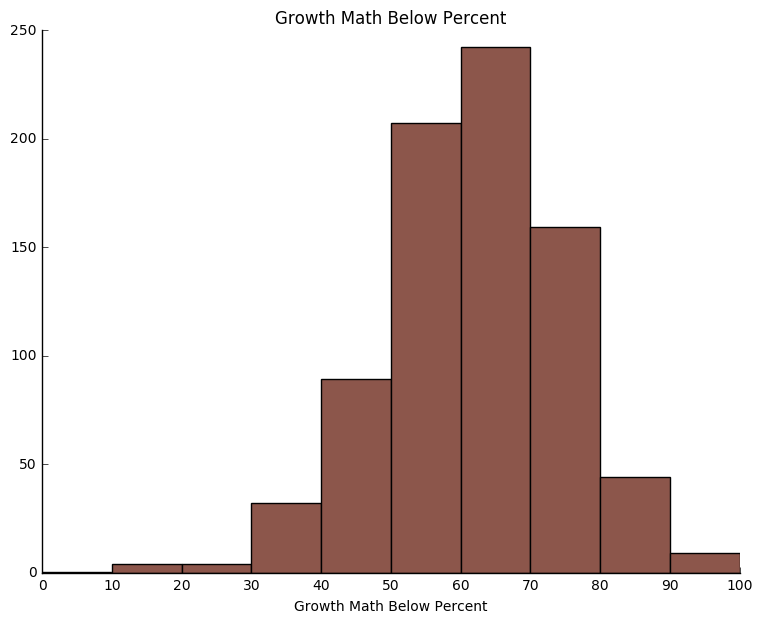

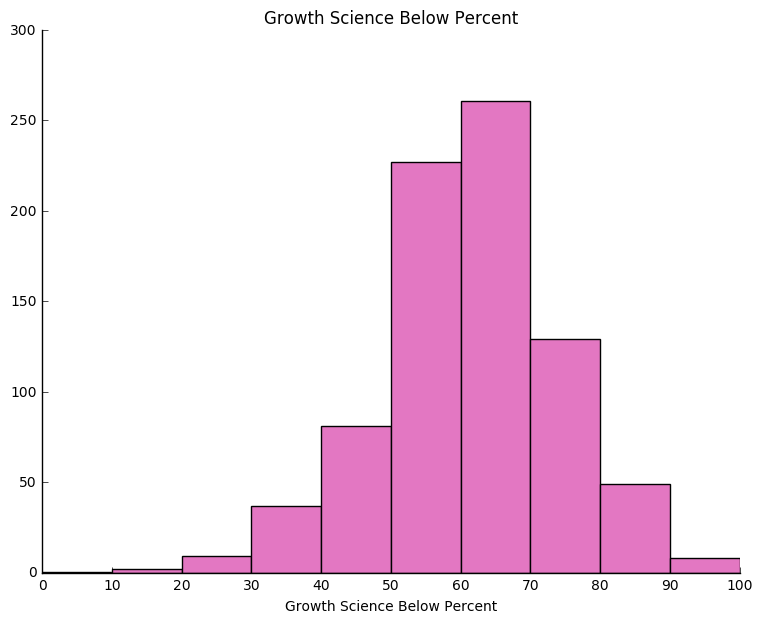

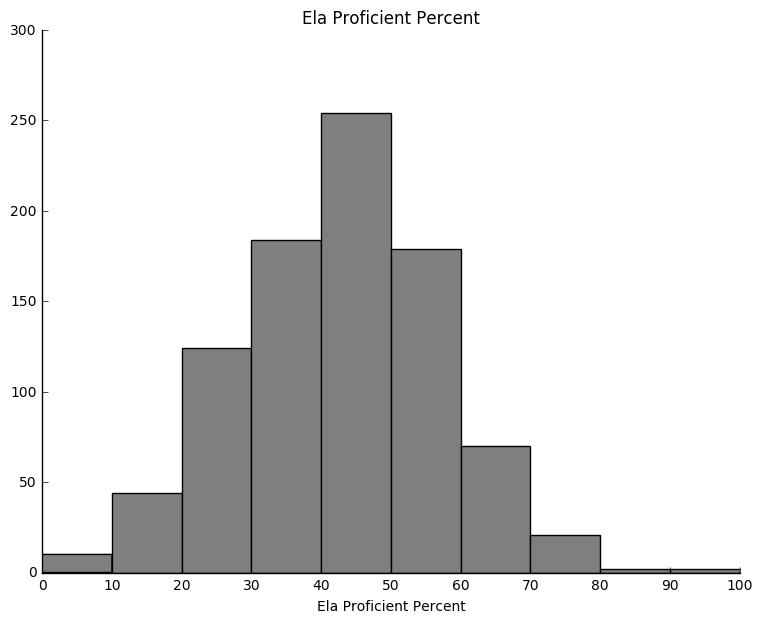

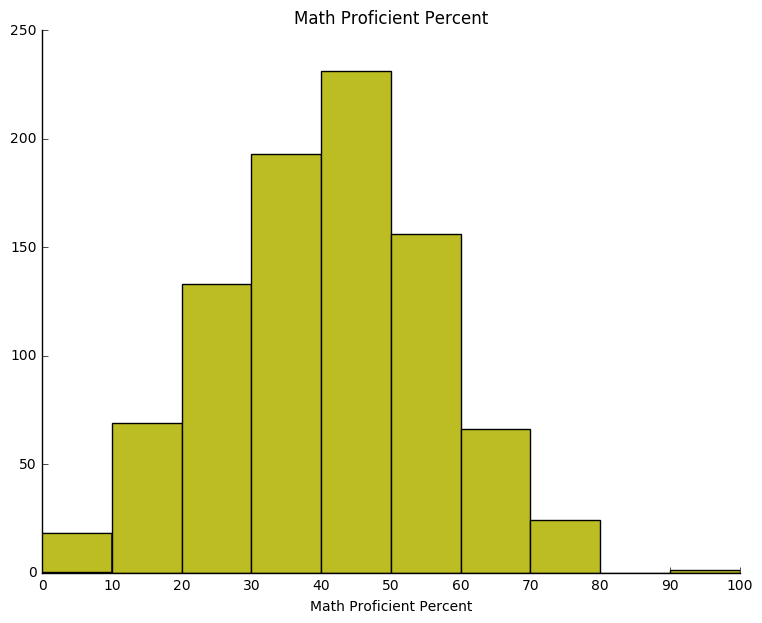

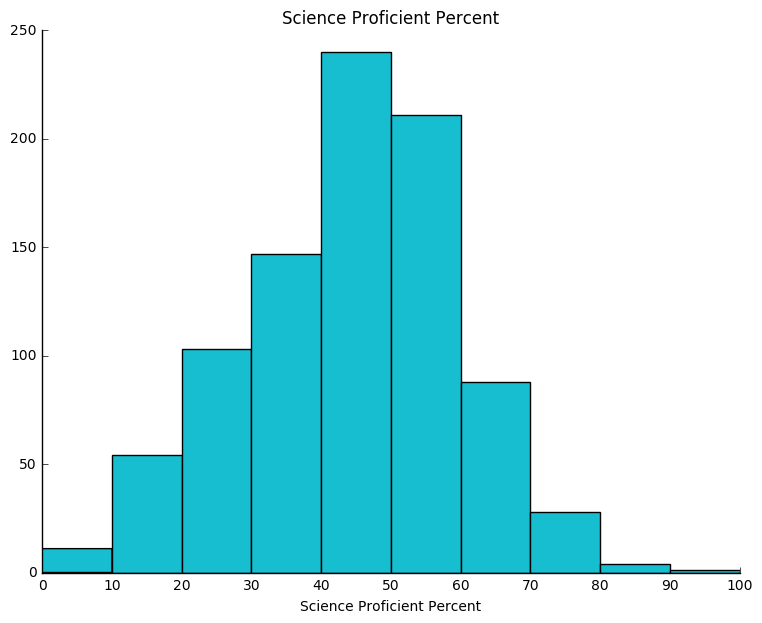

In [72]:
for i in range(len(percent_columns)):
    make_hist_figure(percent_columns[i], tableau20[i*2])

As we can see, the distributions look fairly normal, which means that data analysis shouldn't be too complicated! Check back at my github for more analysis of the data using machine learning techniques. I might also implement income amounts for the schools if I can find an open data set about that.